# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [53]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**
- Does the Smartcab move at all during the simulation? Not yet. It stays still and because of that action (being idle) receives positive or negative feedback (staying still when the light is red gets positive reward and when the light is green gets negative reward)
- What kind of rewards is the driving agent receiving? Both negative and positive rewards based on it's current action (staying still) and the environment's state (traffic light state; green or red)
- How does the light changing color affect the rewards? Not moving when the light is green is punished by receiving negative rewards and positive reward by not moving when the light is red.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**
- alpha: or Learning rate, determines how much the agent utilizes past actions in learning. A value of alpha=1, means only the most recent action is taken into account while a value of 0 means the agent won't learn anything new.
- epsilon: or Random Exploration Factor for epsilon-greedy algorithm, determines the probability of choosing the next Q value vs taking a random action (to explore more). Initially the value of epsilon should be close to 1 so it's more "explorative" and later decreases to 0 towards more "exploitative".
- num_dummies: Number of cars in the environment, the higher, the more challenging the job of the agent is.


- act() is called when an agent performs an action and based on the outcome may receive a reward or not.


- render_text() prints out a textual explanation of the current state of the simulation at each point in time in contrast ot render() method which actually renders the graphical objects on the simulation canvas.


- East-West as it check's "dx != 0" first.


References:
- http://home.deib.polimi.it/restelli/MyWebSite/pdf/rl5.pdf
- https://stats.stackexchange.com/questions/270618/why-does-q-learning-use-epsilon-greedy-during-testing



-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


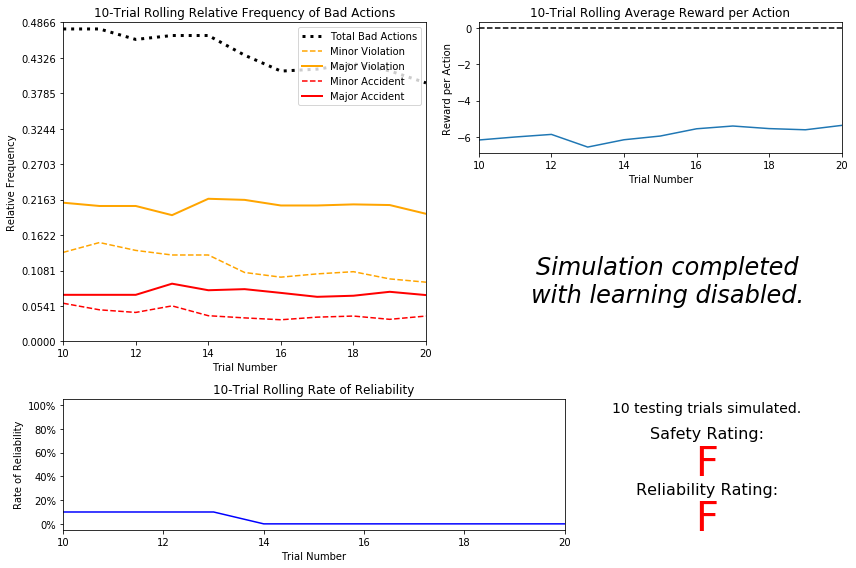

In [54]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

- The cab at this point is driving "Randomly" and as we see in the first panel, about 35% of it's actions are "bad actions" and about 40%-50% of actions cause accidents (Minor and Major).
- As the agent is driving randomly, there's a small chance to make to it's destination ontime but as the grid gets bigger this chance will be smaller as it's less likely to get ot the destination by driving randomely.
- The agent is mostly getting negative rewards as most of it's actions are not approperiate ones hence the accumulative rewards are almost always negative (~ 6-7).
- Doesn't matter how many trials we run, since the agent is driving randomely and the environemnt is not giving the agent any feedback on the reward (agent is not learning) no matter how many trials we run, the outcome will be similar.
- This "SmartCab" is considered neither Safe nor Reliable as it has failed to achieve a reliability score of above 20% in all trials and it has high rate of traffic violations and accidents, and as a result has scored "F" for both measures.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**
- **Waypoint** is one of the most important features that heavily influences both Safety and Reliability. If in a specific state, turing right makes the cab to get closer to the destination, but it truens, left, it makes it get there later which decreases the overall reliability. And if the cab turns left when there are incoming traffic from ahead, then it will cause an accident and hence a lower safety.
- **Trafic light**'s current state is important as crossing a red light or staying idle at a green light both bad moves.
- **Oncoming traffic**'s availibility and the intended direction is also important for the agent's next action. 
- **Left traffic** is important. If the light is red, and we need to turn right and there are incoming traffic from left going straight, we should not be able to make a right.
- **Right traffic** direction isn't really useful since they are in effect when the agent's light are red and when the agent's lights are red, it's not even supposed to cross.
- **Deadline**, I decided not to use the deadline, since the success of the agent and getting to the destination "on time" is indirectly taking into account the time factor.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**
- I chose the following features: (waypoint, inputs['light'], inputs['oncoming'], inputs['left'])
- The size of the state space is sizeof(waypoint) x sizeof(inputs['lights']) x sizeof(inputs['oncoming']) x sizeof(inputs['left']) = 3x2x4x4= 96
- "do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?" Yes. If the number of trials are large enough that the agent can experience each individucal state a few times in it's life time and see the result of different actions in that state, then it will learn an optimal policy for that state.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

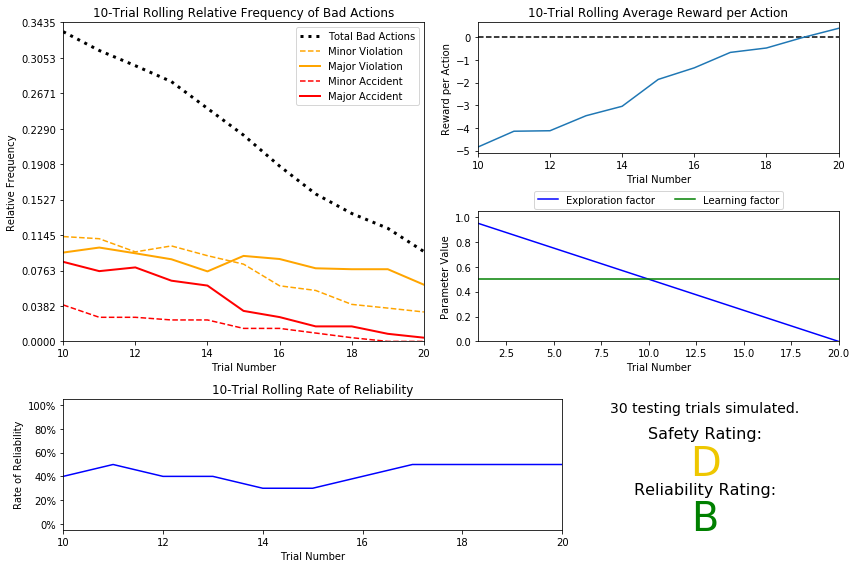

In [60]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**
- At this stage agent is learning but not enough. There are not enough trials for the agent to be exposed to all combinations of states to optimally update the Q-Table.
- About 20 trials were run. Since we started with an epsilon value of 1 and subtracted 0.05 in every trial and the epsilon-treshold was set to 0.05, it takes 1/0.05=20 trials to get to the threshold.
- The decay function is a linear function with negative slope as it's correctly depicted in the panel.
- As the number of training trials increased, the number of bad actions decreased indeed as the agent is learning.
- Safety and reliability is tremendously improved as we have reached (D,B) scores from (F,F).


-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

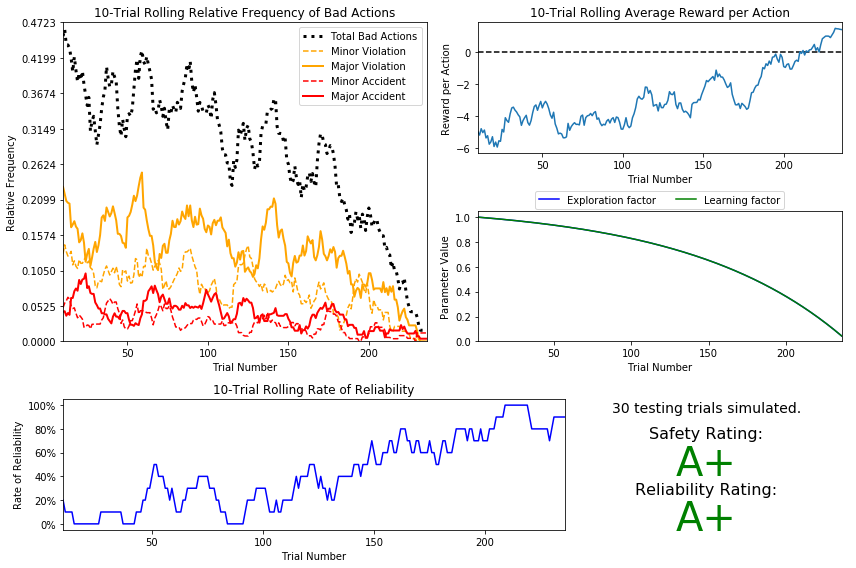

In [69]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**
- I used the follwoing decay function (sudo-code function):
            decayValue = 0.001   # Initial decay value
            ....
            function(oldEps){
                decayValue = decayValue * 1.01
                epsilon = oldEps - decayValue
            }
This decay function initially decays decreases the value of epsilon in small values which results in more exploration and learning. As time passes and the value of decayValue increases, this function decays the epsilon in bigger chunks and let's the agent perform more exploitation.

- About 140 trials were required to finish the training, as our decay function decreases the value of epsilon slowly.

- Epsilon-tolerance was set ot 0.05 and learning-rate (alpha) was not a constant (as is discussed below)

- For the value of Alpha, eventhough we could keep it constant, but I realized we can decay that with the same rate as the epsilon. We have the following formula to calculate the new Q-Values:
Q'[s,a] = (1-alpha)Q[s,a] + alpha.r

Since initially the Q-Table has random (or zero) values that are useless, we prefer to use the new values to recalculate the rewards for each action. But as we proceed, the Q-Table becomes more realistic and more valuable, so the alpha becomes smaller, and as a result the current Q-values become more important. 


- The improved version went from (B,D) to (A+,A+). Which is great and with this granularity of scores, the agent cannot perform better.

- Also I noticed that increasing the test trial numbers makes the outcoming result to be more consistent which makes sense.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 

-1 We can create a similar tabel to the Q-Table and explicitly mention what is the optimal policy in that state for the agent:
e.g.: if(waypoint:right, light:red, oncoming:None, left:forward) => Do not turn right since there's an incoming traffic from left and so on for the other 95 states.

e.g.2: if(waypoint:ANYTHING, light:red, oncoming:ANYTHING, left:ANYTHING) => Do not move

e.g.3: if(waypoint:forward, light:green, oncoming:ANYTHING, left:ANYTHING) => drive forward

e.g.4: if(waypoint:left, light:green, oncoming:forward, left:ANYTHING) => Do not move

e.g.5: if(waypoint:left, light:green, oncoming:None, left:ANYTHING) => turn left

e.g.6: if(waypoint:right, light:red, oncoming:ANYTHING, left:None) => turn right


-2 By investigating the txt file that contains the Q-Table, we see most of the states have the otptimal policy, but there are states that even though follow the optimal policy, they don't miss some approperiate rewards for some actions. For example the following entry:

('left', 'red', 'right', 'right')
 -- left : 0.00
 -- None : 0.00
 -- right : 0.91
 -- forward : -36.76
 
Even though the optimal policy is to turn right and the Q-Value is also turn right, there are identical rewards for turning left and None. Which is not a big deal since at the end of the day, the agent chooses the highest value action which is turning right.

3,4- I cannot really find any entry with a non-optimal policy. One of the worst cases is the following:

('left', 'green', 'forward', 'right')
 -- left : 0.00
 -- None : 0.00
 -- right : 0.73
 -- forward : 0.13
 
 which still gives us the correct policy! light is green and we need to turn left, but since there's an oncoming car is approaching to go forward, we shouldn't turn left. However we can debate that doing None might be better than turning right as this policy advises since turning right instead of left might takes us farther from the destination.

- Also another interesting point is the values of "0.00" which means the agent has never experienced being in that state and "trying" action "a" hence nothing is learned and the entry for that state/action is never updated (initial value of 0.00)

Here are the full optimized Q-table:
 
/-----------------------------------------
| State-action rewards from Q-Learning
\-----------------------------------------

States are labeled as follows: 
(waypoint, inputs['light'], inputs['oncoming'], inputs['left'])

('forward', 'green', None, None)
 -- left : 1.08
 -- None : -5.07
 -- right : 0.51
 -- forward : 1.75

('forward', 'green', 'forward', 'left')
 -- left : 0.00
 -- None : -5.00
 -- right : 0.70
 -- forward : 1.87

('forward', 'red', None, None)
 -- left : -9.93
 -- None : 1.74
 -- right : 0.74
 -- forward : -9.83

('right', 'red', 'forward', 'right')
 -- left : -9.80
 -- None : 0.00
 -- right : 2.39
 -- forward : -13.37

('left', 'red', 'right', None)
 -- left : -39.84
 -- None : 1.74
 -- right : 1.10
 -- forward : -17.50

('forward', 'red', None, 'forward')
 -- left : -40.50
 -- None : 1.72
 -- right : -19.59
 -- forward : -40.08

('right', 'green', 'right', 'forward')
 -- left : -19.60
 -- None : 0.00
 -- right : 1.97
 -- forward : 0.14

('forward', 'green', 'right', 'left')
 -- left : -6.92
 -- None : -5.64
 -- right : 1.20
 -- forward : 2.12

('forward', 'red', 'right', 'forward')
 -- left : -38.31
 -- None : 1.33
 -- right : -20.53
 -- forward : -39.73

('forward', 'red', 'right', 'left')
 -- left : -39.93
 -- None : 0.00
 -- right : 1.17
 -- forward : 0.00

('left', 'green', 'right', 'left')
 -- left : -19.96
 -- None : -5.37
 -- right : 0.17
 -- forward : 0.69

('forward', 'green', 'left', 'left')
 -- left : 0.35
 -- None : -5.37
 -- right : 0.74
 -- forward : 2.04

('forward', 'red', 'forward', 'forward')
 -- left : -39.58
 -- None : 1.13
 -- right : -19.13
 -- forward : -40.77

('right', 'green', 'forward', None)
 -- left : -19.58
 -- None : -4.79
 -- right : 1.94
 -- forward : 0.49

('left', 'red', 'left', 'left')
 -- left : -9.86
 -- None : 1.72
 -- right : 1.25
 -- forward : -23.64

('forward', 'green', None, 'right')
 -- left : 0.93
 -- None : -5.35
 -- right : 1.06
 -- forward : 1.99

('right', 'red', 'left', 'left')
 -- left : -9.45
 -- None : 0.35
 -- right : 2.36
 -- forward : -10.53

('left', 'red', 'forward', 'forward')
 -- left : -38.97
 -- None : 2.14
 -- right : -20.48
 -- forward : -39.78

('forward', 'green', 'forward', 'forward')
 -- left : -20.16
 -- None : -4.30
 -- right : 0.94
 -- forward : 1.81

('left', 'green', 'forward', 'right')
 -- left : 0.00
 -- None : 0.00
 -- right : 0.73
 -- forward : 0.13

('left', 'red', None, 'forward')
 -- left : -39.89
 -- None : 1.99
 -- right : -19.90
 -- forward : -40.34

('left', 'green', 'right', 'forward')
 -- left : -17.93
 -- None : -4.59
 -- right : 0.56
 -- forward : 0.91

('left', 'red', None, 'left')
 -- left : -9.68
 -- None : 1.92
 -- right : 0.49
 -- forward : -10.71

('right', 'red', 'right', 'left')
 -- left : -33.14
 -- None : 0.00
 -- right : 1.49
 -- forward : -10.54

('right', 'red', 'left', None)
 -- left : -21.49
 -- None : 0.73
 -- right : 1.96
 -- forward : -10.15

('left', 'green', 'right', 'right')
 -- left : -15.87
 -- None : 0.00
 -- right : -0.01
 -- forward : 0.53

('forward', 'green', 'forward', None)
 -- left : -19.99
 -- None : -4.85
 -- right : 0.89
 -- forward : 2.24

('forward', 'red', 'right', 'right')
 -- left : -39.14
 -- None : 0.00
 -- right : 0.88
 -- forward : 0.00

('forward', 'red', 'left', 'left')
 -- left : -9.44
 -- None : 2.05
 -- right : -0.04
 -- forward : -27.37

('left', 'green', None, 'left')
 -- left : 1.52
 -- None : -4.42
 -- right : 0.54
 -- forward : 0.75

('right', 'green', 'right', None)
 -- left : -20.26
 -- None : -5.13
 -- right : 1.70
 -- forward : 1.08

('left', 'red', 'left', 'forward')
 -- left : -40.42
 -- None : 1.15
 -- right : -16.23
 -- forward : -40.02

('left', 'green', 'forward', None)
 -- left : -19.66
 -- None : -5.36
 -- right : 0.11
 -- forward : 0.69

('forward', 'red', 'right', None)
 -- left : -40.26
 -- None : 0.14
 -- right : 0.59
 -- forward : -9.82

('left', 'green', None, 'forward')
 -- left : 1.26
 -- None : -5.40
 -- right : 1.11
 -- forward : 0.83

('forward', 'red', 'left', 'forward')
 -- left : -39.76
 -- None : 1.42
 -- right : -19.99
 -- forward : 0.00

('right', 'red', None, 'left')
 -- left : -10.66
 -- None : 0.95
 -- right : 1.87
 -- forward : -20.03

('left', 'red', 'forward', 'right')
 -- left : -10.38
 -- None : 1.12
 -- right : 0.12
 -- forward : -9.30

('left', 'red', 'left', None)
 -- left : -15.53
 -- None : 1.90
 -- right : 0.35
 -- forward : -9.72

('left', 'green', 'forward', 'forward')
 -- left : -9.12
 -- None : -5.32
 -- right : 0.29
 -- forward : 0.18

('right', 'green', 'forward', 'forward')
 -- left : -19.40
 -- None : 0.00
 -- right : 1.95
 -- forward : 0.61

('right', 'green', 'right', 'left')
 -- left : -18.64
 -- None : -4.46
 -- right : 0.00
 -- forward : 0.33

('forward', 'red', None, 'left')
 -- left : -12.61
 -- None : 1.65
 -- right : 0.39
 -- forward : -9.70

('left', 'red', 'left', 'right')
 -- left : -9.89
 -- None : 1.97
 -- right : 1.52
 -- forward : -10.87

('left', 'red', 'right', 'left')
 -- left : -39.56
 -- None : 0.84
 -- right : 1.13
 -- forward : -33.81

('right', 'red', 'forward', 'left')
 -- left : -8.98
 -- None : 0.38
 -- right : 2.39
 -- forward : -10.32

('left', 'red', 'forward', 'left')
 -- left : -17.60
 -- None : 1.54
 -- right : 0.98
 -- forward : -11.29

('forward', 'green', None, 'forward')
 -- left : 0.51
 -- None : -4.87
 -- right : 0.72
 -- forward : 1.86

('right', 'red', 'right', None)
 -- left : -39.68
 -- None : 0.67
 -- right : 1.25
 -- forward : -10.68

('forward', 'green', 'right', 'right')
 -- left : -13.81
 -- None : 0.00
 -- right : 0.39
 -- forward : 0.67

('left', 'red', 'forward', None)
 -- left : -10.58
 -- None : 1.82
 -- right : 0.55
 -- forward : -10.19

('right', 'green', 'right', 'right')
 -- left : 0.00
 -- None : -4.12
 -- right : 0.00
 -- forward : 0.78

('left', 'red', None, None)
 -- left : -16.53
 -- None : 1.67
 -- right : 0.65
 -- forward : -10.34

('right', 'red', 'forward', 'forward')
 -- left : -40.37
 -- None : 1.06
 -- right : -19.46
 -- forward : -39.41

('right', 'red', 'left', 'forward')
 -- left : -33.75
 -- None : 1.47
 -- right : -19.90
 -- forward : -40.17

('left', 'green', None, None)
 -- left : 1.73
 -- None : -5.35
 -- right : 0.31
 -- forward : 0.50

('right', 'green', None, 'forward')
 -- left : 0.33
 -- None : -5.63
 -- right : 2.09
 -- forward : 0.37

('left', 'green', None, 'right')
 -- left : 1.71
 -- None : -4.79
 -- right : 0.49
 -- forward : -0.06

('right', 'green', 'left', None)
 -- left : 0.62
 -- None : -5.24
 -- right : 0.91
 -- forward : 0.54

('right', 'green', None, 'left')
 -- left : 0.75
 -- None : -4.87
 -- right : 1.70
 -- forward : 1.04

('forward', 'green', 'right', 'forward')
 -- left : -17.74
 -- None : -3.93
 -- right : 0.00
 -- forward : 2.02

('right', 'red', 'left', 'right')
 -- left : -5.70
 -- None : 1.36
 -- right : 2.40
 -- forward : -11.45

('left', 'green', 'left', 'forward')
 -- left : 0.76
 -- None : -5.05
 -- right : 0.31
 -- forward : 0.83

('right', 'red', None, 'forward')
 -- left : -39.40
 -- None : 1.03
 -- right : -19.85
 -- forward : -39.37

('right', 'green', 'forward', 'left')
 -- left : -12.47
 -- None : -4.60
 -- right : 1.48
 -- forward : 0.31

('left', 'red', None, 'right')
 -- left : -10.13
 -- None : 1.45
 -- right : 1.21
 -- forward : -12.05

('right', 'green', None, 'right')
 -- left : -0.12
 -- None : -5.14
 -- right : 1.34
 -- forward : 0.75

('forward', 'green', 'left', 'right')
 -- left : 1.09
 -- None : -4.41
 -- right : 0.75
 -- forward : 2.20

('forward', 'red', 'left', None)
 -- left : -10.39
 -- None : 1.72
 -- right : 0.60
 -- forward : -10.13

('forward', 'green', None, 'left')
 -- left : 0.80
 -- None : -4.88
 -- right : 0.46
 -- forward : 1.87

('left', 'green', 'left', None)
 -- left : 1.88
 -- None : -5.09
 -- right : 1.13
 -- forward : 0.99

('left', 'red', 'right', 'forward')
 -- left : -39.01
 -- None : 1.65
 -- right : -14.37
 -- forward : -12.93

('right', 'green', 'left', 'forward')
 -- left : 0.45
 -- None : -5.40
 -- right : 1.39
 -- forward : 1.11

('forward', 'red', 'forward', 'right')
 -- left : 0.00
 -- None : 1.79
 -- right : 0.46
 -- forward : 0.00

('right', 'green', 'left', 'right')
 -- left : -0.06
 -- None : -4.49
 -- right : 1.10
 -- forward : 0.94

('right', 'red', 'right', 'forward')
 -- left : -32.20
 -- None : 0.84
 -- right : -20.64
 -- forward : -39.70

('left', 'green', 'forward', 'left')
 -- left : -19.83
 -- None : -3.79
 -- right : 0.46
 -- forward : -0.55

('right', 'red', None, 'right')
 -- left : -12.62
 -- None : 0.87
 -- right : 0.88
 -- forward : -10.59

('left', 'green', 'left', 'left')
 -- left : 1.30
 -- None : -5.12
 -- right : 0.47
 -- forward : 1.13

('forward', 'red', 'forward', 'left')
 -- left : -9.95
 -- None : 1.46
 -- right : 0.55
 -- forward : -9.16

('forward', 'green', 'left', 'forward')
 -- left : 0.13
 -- None : -5.21
 -- right : 0.99
 -- forward : 1.39

('right', 'green', 'forward', 'right')
 -- left : -19.01
 -- None : 0.00
 -- right : 1.65
 -- forward : 1.10

('right', 'green', None, None)
 -- left : 0.69
 -- None : -4.56
 -- right : 1.48
 -- forward : 0.90

('forward', 'red', None, 'right')
 -- left : -9.87
 -- None : 1.36
 -- right : 0.93
 -- forward : -9.92

('right', 'red', 'forward', None)
 -- left : -10.47
 -- None : 0.85
 -- right : 1.91
 -- forward : -9.64

('forward', 'green', 'left', None)
 -- left : 0.81
 -- None : -5.03
 -- right : 0.39
 -- forward : 1.88

('left', 'red', 'right', 'right')
 -- left : 0.00
 -- None : 0.00
 -- right : 0.91
 -- forward : -36.76

('right', 'green', 'left', 'left')
 -- left : 0.34
 -- None : -4.62
 -- right : 1.88
 -- forward : 1.19

('forward', 'red', 'left', 'right')
 -- left : -9.05
 -- None : 1.83
 -- right : 1.05
 -- forward : 0.00

('left', 'green', 'right', None)
 -- left : -19.83
 -- None : -5.00
 -- right : 1.23
 -- forward : 0.38

('left', 'green', 'left', 'right')
 -- left : 2.28
 -- None : -4.30
 -- right : 0.42
 -- forward : 0.99

('forward', 'green', 'forward', 'right')
 -- left : -18.85
 -- None : -3.87
 -- right : 0.84
 -- forward : 0.00

('forward', 'red', 'forward', None)
 -- left : -9.72
 -- None : 1.79
 -- right : 1.46
 -- forward : -17.85

('forward', 'green', 'right', None)
 -- left : -20.60
 -- None : -5.46
 -- right : 0.09
 -- forward : 1.92

('right', 'red', None, None)
 -- left : -9.87
 -- None : 0.73
 -- right : 1.89
 -- forward : -10.71



-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**
- There are no localization in the environment and the agent has no sense of location at any point in time, so that could be one of the reasons that the future rewards are not gonna be useful for this case.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.